## Pneumonia Detection using Convolutional Neural Network

Classifying medical images into their respective categories using CNN.

The dataset comprises 5,863 JPEG X-Ray images and is categorised into two types (Pneumonia and Normal), organised into three folders: train, test, and val. Each folder contains subfolders for each image type.

**Dataset:** [Click Here](https://drive.google.com/file/d/1219EeGE1XTJVXYaulynJSa3BXGsbNCLx/view?usp=sharing)

### Setup

In [2]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import layers, models
import pandas as pd

### Data Loading

In [48]:
train_dir = 'pneumonia/train'
test_dir = 'pneumonia/test'
val_dir = 'pneumonia/val'

img_size = (180, 180)
batch_size = 32
epochs = 8

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

### Data Preprocessing

In [23]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'  # Adjust this based on your problem
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'  # Adjust this based on your problem
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'  # Adjust this based on your problem
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


### Data Visualization

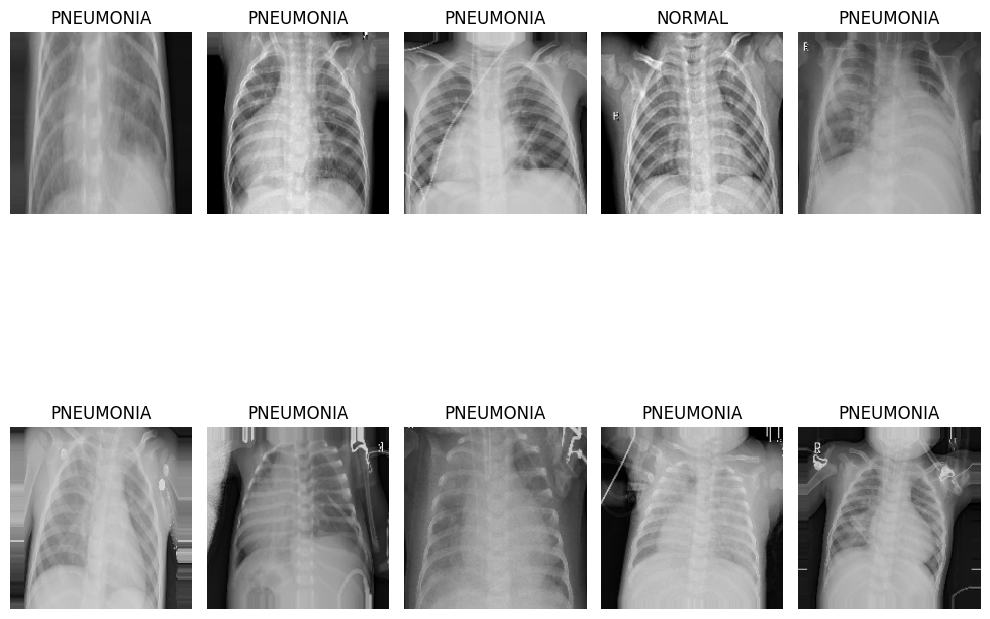

In [24]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 10))

for i in range(10):
    X_batch, Y_batch = next(train_generator)

    image = X_batch[0]

    label = 'NORMAL' if Y_batch[0] == 0 else 'PNEUMONIA'

    plt.subplot(2, 5, i+1)
    plt.title(label)
    plt.axis('off')
    plt.imshow(np.squeeze(image), cmap='gray', interpolation='nearest')

plt.tight_layout()
plt.show()


### CNN Model

In [49]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Adjust the number of output nodes based on your problem

model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Adjust the loss function based on your problem
              metrics=['accuracy'])


### Training

In [30]:
history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=val_generator,
                    verbose=1)

Epoch 1/8
163/163 [==============================] - 180s 1s/step - loss: 0.3794 - accuracy: 0.8368 - val_loss: 0.6366 - val_accuracy: 0.7500
Epoch 2/8
163/163 [==============================] - 174s 1s/step - loss: 0.2369 - accuracy: 0.9051 - val_loss: 0.3405 - val_accuracy: 0.8750
Epoch 3/8
163/163 [==============================] - 193s 1s/step - loss: 0.2136 - accuracy: 0.9162 - val_loss: 0.9168 - val_accuracy: 0.6250
Epoch 4/8
163/163 [==============================] - 176s 1s/step - loss: 0.1865 - accuracy: 0.9266 - val_loss: 0.8491 - val_accuracy: 0.5625
Epoch 5/8
163/163 [==============================] - 171s 1s/step - loss: 0.1749 - accuracy: 0.9302 - val_loss: 0.6382 - val_accuracy: 0.6250
Epoch 6/8
163/163 [==============================] - 186s 1s/step - loss: 0.1708 - accuracy: 0.9329 - val_loss: 1.0952 - val_accuracy: 0.6250
Epoch 7/8
163/163 [==============================] - 219s 1s/step - loss: 0.1587 - accuracy: 0.9408 - val_loss: 0.7052 - val_accuracy: 0.6250
Epoch 

### Model Evaluation on the test set

In [31]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test accuracy: {test_acc}')

19/19 [==============================] - 16s 883ms/step - loss: 0.3903 - accuracy: 0.8635
Test accuracy: 0.8634868264198303


### Training and Validation Accuracy

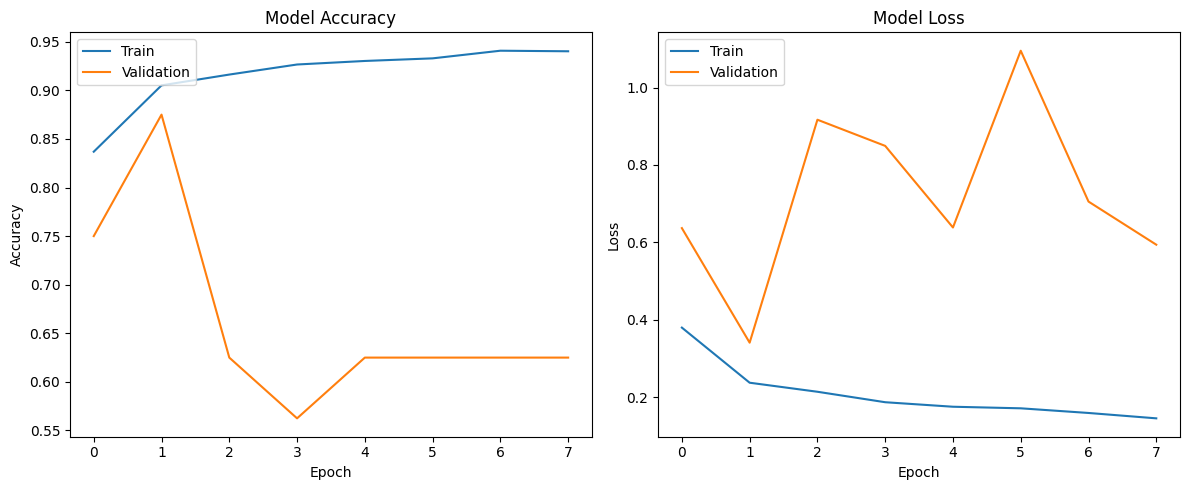

In [32]:
def plot_curves(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

plot_curves(history)

### Predictions

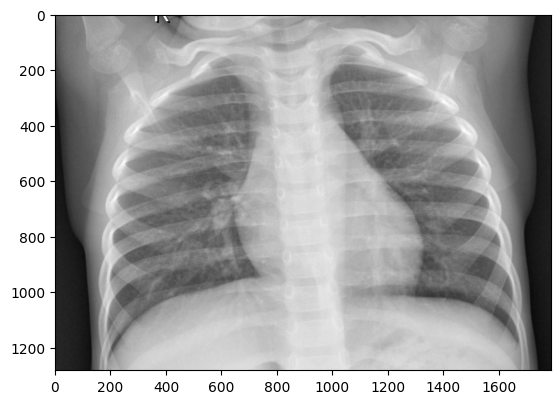

1/1 [==============================] - 0s 36ms/step
Prediction Probabilities: [[0.15642695]]
Normal


In [44]:
import cv2
image = cv2.imread('pneumonia/test/NORMAL/IM-0093-0001.jpeg')
plt.imshow(image)
plt.show()
image_resized = cv2.resize(image, (180, 180))
image_normalized = image_resized / 255.0
image_reshaped = np.reshape(image_normalized, (1, 180, 180, 3))
prediction = model.predict(image_reshaped)
print("Prediction Probabilities:", prediction)
predicted_label = np.argmax(prediction)

if prediction >= 0.5:
  print('Pneumonia')
else:
  print('Normal')

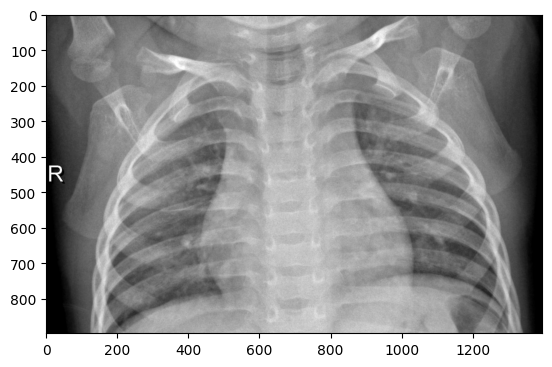

1/1 [==============================] - 0s 81ms/step
Prediction Probabilities: [[0.45515138]]
Normal


In [45]:
import cv2
image = cv2.imread('pneumonia/test/NORMAL/NORMAL2-IM-0290-0001.jpeg')
plt.imshow(image)
plt.show()
image_resized = cv2.resize(image, (180, 180))
image_normalized = image_resized / 255.0
image_reshaped = np.reshape(image_normalized, (1, 180, 180, 3))
prediction = model.predict(image_reshaped)
print("Prediction Probabilities:", prediction)
predicted_label = np.argmax(prediction)

if prediction >= 0.5:
  print('Pneumonia')
else:
  print('Normal')

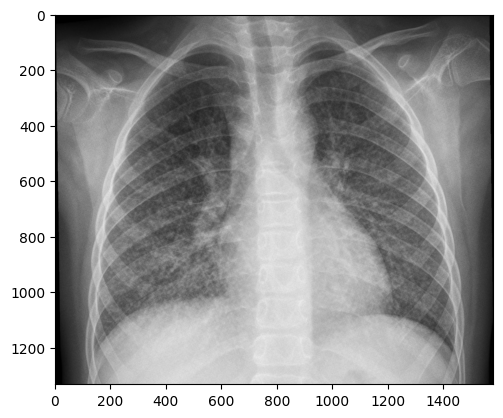

1/1 [==============================] - 0s 30ms/step
Prediction Probabilities: [[0.9082412]]
Pneumonia


In [46]:
import cv2
image = cv2.imread('pneumonia/test/PNEUMONIA/person16_virus_47.jpeg')
plt.imshow(image)
plt.show()
image_resized = cv2.resize(image, (180, 180))
image_normalized = image_resized / 255.0
image_reshaped = np.reshape(image_normalized, (1, 180, 180, 3))
prediction = model.predict(image_reshaped)
print("Prediction Probabilities:", prediction)
predicted_label = np.argmax(prediction)

if prediction >= 0.5:
  print('Pneumonia')
else:
  print('Normal')

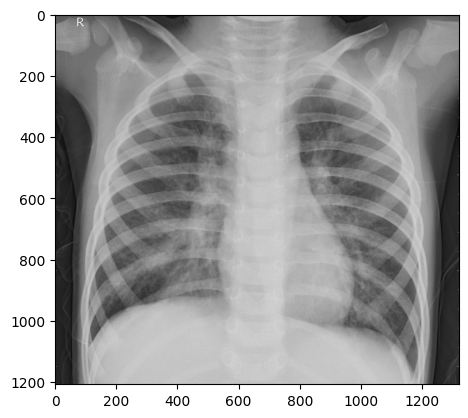

1/1 [==============================] - 0s 46ms/step
Prediction Probabilities: [[0.9595388]]
Pneumonia


In [47]:
import cv2
image = cv2.imread('pneumonia/test/PNEUMONIA/person20_virus_51.jpeg')
plt.imshow(image)
plt.show()
image_resized = cv2.resize(image, (180, 180))
image_normalized = image_resized / 255.0
image_reshaped = np.reshape(image_normalized, (1, 180, 180, 3))
prediction = model.predict(image_reshaped)
print("Prediction Probabilities:", prediction)
predicted_label = np.argmax(prediction)

if prediction >= 0.5:
  print('Pneumonia')
else:
  print('Normal')

### Conclusion

The number of normal and pneumonia images are not equal leading to an unbalanced dataset. The model is performing well but overfitting can occur. To address this issue, need to balance the dataset.